# Finding trends of most discussed personalities in news from october 31 to November 10 (Named ENTITY RECOGNITION)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from collections import Counter
import spacy
nlp = spacy.load('nb_core_news_lg')
df = pd.read_csv('new_cop26_data.csv',nrows=10000,index_col=0)


### Generating graph for top mentioned entities in the title

In [2]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['title'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=Counter(ent)
count=counter.most_common()


[Text(0.5, 0, 'count'),
 Text(0, 0.5, 'Entites'),
 Text(0.5, 1.0, 'Count of each entity present in the dataset')]

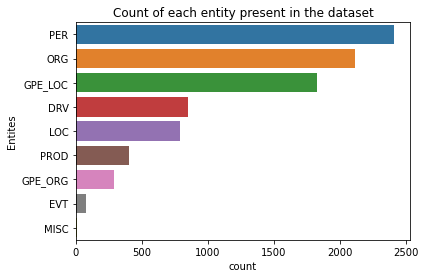

In [3]:
x,y=map(list,zip(*count))
ax=sns.barplot(x=y,y=x)
ax.set(xlabel="count", ylabel = "Entites", title='Count of each entity present in the dataset')

### Making dictionary of personalities

In [4]:
personalities = []
for i in df['title'].tolist():
    doc = nlp(i)
    for entity in doc.ents:
        if entity.label_ == 'PER':
            personalities.append(entity.text)
        else:
            pass

In [5]:
personalities

['Sandra Lyng',
 'Kristus',
 'Sanna',
 'Tobarnsmor',
 'Macron',
 'B',
 'Joseph Mulvin',
 'Boliginnbrudd',
 'Victor Lafey',
 'Musk',
 'Diego Sports',
 'Abo',
 'Fred Åge',
 'Zlatan Ibrahimovic',
 'Zlatan',
 'Ingvild',
 'Raja',
 'Paparazzi Magazine',
 'Ingvald',
 'Thor',
 'Silje',
 'Simon',
 'Vedum',
 'Renates',
 'Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Zlatan',
 'Zlatan Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Zlatan Ibrahimovic',
 'Zlatan Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Ibrahimovic',
 'Pallesen',
 'Lars',
 'Lars',
 'Segberg',
 'Renates',
 'Martine',
 'Martine',
 'Martine',
 'Mistet',
 'Helikoptertransport',
 'Vigdis',
 'Bjørn',
 'Mikael Bruun',
 'Lars Bohinen',
 'Simen',
 'Herman',
 'Abo',
 'Herman Herding',
 'Skår',
 'Kjartansson',
 'Kjartansson',
 'Kjartansson',
 'Kjartansson',
 'Kjartansson',
 'Kjartansson',
 'Herman',
 'Aina',
 'Eva',
 'Steinar',
 'Eva',
 'Steinar',
 'Kristine',
 'Johnny',
 'Jan Davidsen'

In [6]:
# top 15 personlitiee
Counter = Counter(personalities)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(15)
  
print(most_occur)

[('Abo', 47), ('Støre', 33), ('Solskjær', 30), ('Bjørkan', 30), ('Boris Johnson', 29), ('Vedum', 27), ('Line Andersen', 27), ('Biden', 25), ('Bollestad', 24), ('Tande', 23), ('Kvam', 21), ('Wikestad', 21), ('Chelsea', 19), ('Sander Sagosen', 18), ('Renates', 17)]


Text(0.5, 1.0, 'Top 15 personalities')

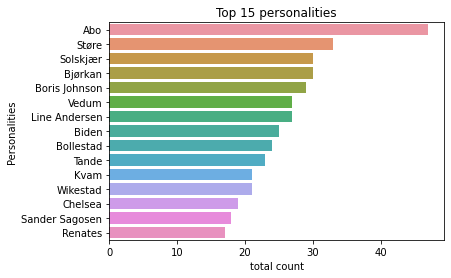

In [7]:
#visualizing personalities
x,y=map(list,zip(*most_occur))
sns.barplot(x=y,y=x).set( xlabel = "total count", ylabel = "Personalities")
plt.title('Top 15 personalities')

df.to_csv('personalities.csv')

### Analyzing personalities

In [8]:
personality_data = pd.read_csv('personalities.csv')
personality_data.head(2)

,id,url,og_url,domain,title,description,content,entities,authors,paywall,...,word_count,is_homepage,is_document,http_code,feeds,cat_id,cat_score,outbound_link_ids,inbound_link_ids,personalities
0,KQe1r321ZaJY,https://www.abcnyheter.no/nyheter/norge/2021/1...,https://www.abcnyheter.no/a/195798411/,www.abcnyheter.no,Færre vil møte klimakrisen med tiltak som i ko...,Andelen som vil ha like kraftige tiltak mot kl...,"Samtidig som klimatoppmøtet i Glasgow starter,...","['Glasgow', 'Fokus', 'Norge', 'Klimatoppmøtet'...",NaN,NaN,...,183,NaN,False,200,NaN,154.0,0.963856,NaN,NaN,[]
1,jnegLMrLkawZ,https://www.ao.no/oslo-fergenes-siste-dag-pa-f...,https://www.ao.no/5-128-204411,www.ao.no,(+) Oslo-Fergenes siste dag på fjorden: – Det ...,Siden 1917 har Oslo-Fergene fraktet turister o...,"Øyene, Ferger | Oslo-Fergenes siste dag på fjo...",NaN,['Sevda Barazesh'],1.0,...,0,NaN,False,200,NaN,NaN,NaN,NaN,['LDdwm7PORa1Y'],[]


In [9]:
# defining functions for finding names, names with single words
import re
def remove_extras(text):
  try:
    res = re.sub(r"[\[\]]", "", text)
    return str(res)
  except:
    return str(text)
# how many time personalities discussed in dataset
def is_name_mentioned(x):
  x = x.split(" ")
  for i in x:
    if i=='':
      return "No"
    else:
      return "Yes"

def is_first_name(x):
  x = x.split(" ")
  counter = 0
  try:
    for i in x:
      if i=="":
        return counter
      elif i!="":
        counter = counter+1
    return counter
  except Exception as e:
    print("Something wrong",e)



In [10]:
personality_data['personalities']= personality_data['personalities'].apply(remove_extras)
personality_data['personalities_mentioned']= personality_data['personalities'].apply(is_name_mentioned)
personality_data['first_name_mentioned']= personality_data['personalities'].apply(is_first_name)

In [11]:
# counting how many times news articles are discussing about personalities
personality_data.groupby("personalities_mentioned").size()

personalities_mentioned
No     69920
Yes    17718
dtype: int64

In [12]:
personality_data.groupby("first_name_mentioned").size()

first_name_mentioned
0     69920
1     10742
2      5425
3      1144
4       299
5        76
6        22
7         3
8         5
9         1
20        1
dtype: int64

<AxesSubplot:title={'center':'Counting how many times news articles are discussing about personalities'}, xlabel='name_mentioned', ylabel='count'>

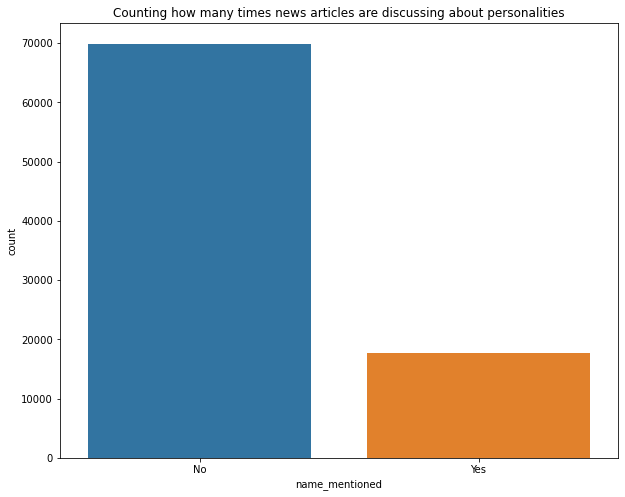

In [13]:
#Visualizing 
name_mentioned = ["No","Yes"]
count = [69920,17718]

df = pd.DataFrame()
df['name_mentioned'] = name_mentioned
df['count'] = count

plt.figure(figsize=(10,8))
plt.title('Counting how many times news articles are discussing about personalities')


sns.barplot(x = 'name_mentioned',
            y = 'count',
            data = df)
 
# Show the plot

In [14]:
# From the personalities, how many time single and full names are mentioned 
no_name=personality_data[personality_data['first_name_mentioned']==0]
first_name=personality_data[personality_data['first_name_mentioned']==1]
second_name=personality_data[personality_data['first_name_mentioned']==2]

all_personality = pd.concat([no_name,first_name,second_name])

In [15]:
all_personality['first_name_mentioned'] = all_personality['first_name_mentioned'].apply({0:"No_Name",
                                                                                         1:"Single_Name",
                                                                                         2:"Full_name"}.get)

In [16]:
all_personality.groupby('first_name_mentioned').size()

first_name_mentioned
Full_name       5425
No_Name        69920
Single_Name    10742
dtype: int64

<AxesSubplot:title={'center':'How many times Single-Name and Full-Name are Mentioned'}, xlabel='Name', ylabel='f_count'>

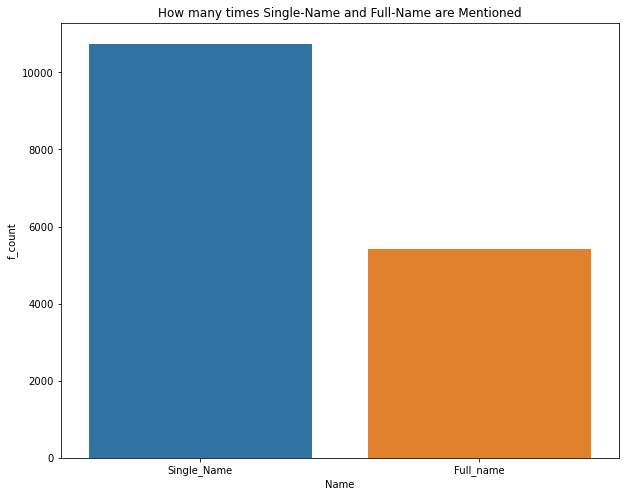

In [17]:
# visualizing result
first_name = ['Single_Name',"Full_name"]
f_count = [10742,5425]
df = pd.DataFrame()
df['Name'] = first_name
df['f_count'] = f_count

plt.figure(figsize=(10,8))
plt.title('How many times Single-Name and Full-Name are Mentioned')


sns.barplot(x = 'Name',
            y = 'f_count',
            data = df)

### Replacing single names and ploting personalities based on their trends in Norwegian news articles

In [18]:
personality_data['pub_date']= pd.to_datetime(personality_data['pub_date'])

In [19]:
#playing around with dates
personality_data['month'] = personality_data['pub_date'].dt.month
personality_data['day'] = personality_data['pub_date'].dt.day
personality_data.groupby('month').size()

month
10     4612
11    83026
dtype: int64

In [20]:
# extracting data for the first week of november 21
personality_data = personality_data[personality_data['month']==11]
mask = (personality_data['day'] >= 1) & (personality_data['day'] <= 7)
week_data = personality_data.loc[mask]

In [21]:
week_data.groupby('day').size()

day
1    6782
2    7064
3    7012
4    7308
5    6896
6    4479
7    4677
dtype: int64

In [22]:
week_data['personalities']= week_data['personalities'].apply(remove_extras)

<ipython-input-22-c9bf28fd7a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['personalities']= week_data['personalities'].apply(remove_extras)


<ipython-input-23-8ed35b732c22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['personalities']= week_data['personalities'].apply(remove_extras)


<AxesSubplot:title={'center':'Top 10 Most mentioned Names overtime'}>

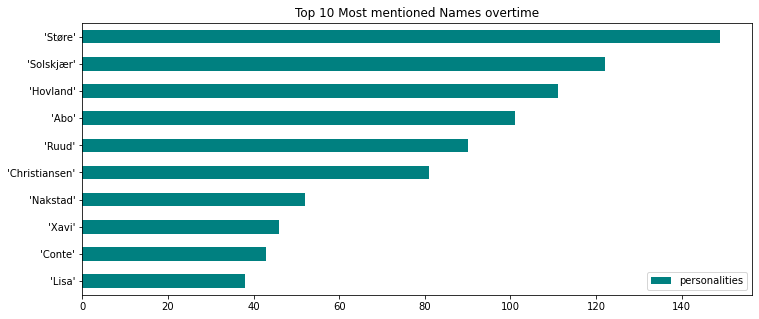

In [23]:
#Checking to 10 personalities
week_data['personalities']= week_data['personalities'].apply(remove_extras)
week_data = week_data[week_data['personalities']!='[]']
week_data=week_data[week_data['personalities']!='']
week_data.personalities.value_counts()[:10].sort_values().plot(kind = 'barh',color='teal',
                                                            figsize=(12,5),legend=True,
                                                            title='Top 10 Most mentioned Names overtime')

<AxesSubplot:title={'center':'Top 10 Most mentioned Names overtime'}>

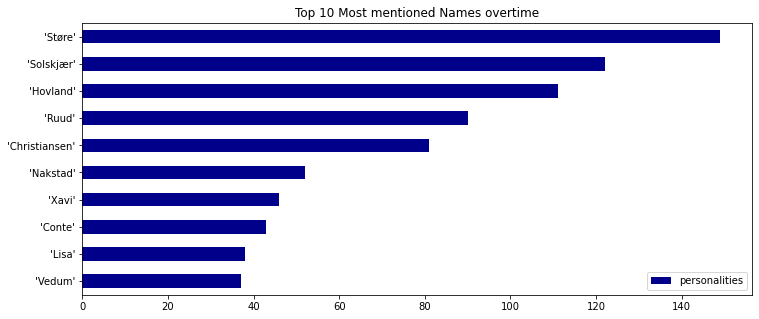

In [24]:
#Discarding wrong names spacified by SpaCY
week_data = week_data[week_data['personalities']!="'Abo'"]
week_data = week_data[week_data['personalities']!="'Olavs hospital'"]
week_data.personalities.value_counts()[:10].sort_values().plot(kind = 'barh',color='darkblue',
                                                            figsize=(12,5),legend=True,
                                                            title='Top 10 Most mentioned Names overtime')

In [25]:
#making list of top 10 personalities
week_data['personalities'] = week_data['personalities'].apply(str)
list_of_values = ["'Støre'","'Solskjær'","'Hovland'","'Lisa'","'Ruud'","'Christiansen'","'Nakstad'","Xavi'","'Conte'","'Vedum'"]
top_10_persons = week_data[week_data['personalities'].isin(list_of_values)]

In [26]:
top_10_persons['pub_date'] = pd.to_datetime(top_10_persons['pub_date']).dt.date
top_10_persons['pub_date'].head(2)

<ipython-input-26-b9dd548baa23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_persons['pub_date'] = pd.to_datetime(top_10_persons['pub_date']).dt.date


4682    2021-11-01
4683    2021-11-01
Name: pub_date, dtype: object

In [27]:
# Count of top nine
top_10_persons.groupby('personalities').size()

personalities
'Christiansen'     81
'Conte'            43
'Hovland'         111
'Lisa'             38
'Nakstad'          52
'Ruud'             90
'Solskjær'        122
'Støre'           149
'Vedum'            37
dtype: int64

In [28]:
# replacing single names with full names, by mually comparing it to the content
top_10_persons['personalities'] = top_10_persons['personalities'].replace({"Støre":"Jonas Gahr Støre",
                                                                         "Solskjær":"Ole Gunnar Solskjær",
                                                                         "Ruud":"Casper Ruud",
                                                                         "Conte":"Antonio Conte",
                                                                         "Nakstad":"Espen Rostrup Nakstad",
                                                                         "Hovland":"Viktor Hovland",
                                                                         "Christiansen":"Henrik Christiansen",
                                                                         "Lisa":"Lisa Golden",
                                                                         "Vedum":"Trygve Magnus Slagsvold Vedum"},regex = True)

<ipython-input-28-583b4f44c846>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_persons['personalities'] = top_10_persons['personalities'].replace({"Støre":"Jonas Gahr Støre",


In [29]:
def remove_quotes(text):
  new_string=text.strip("''")
  return new_string

In [30]:
top_10_persons['personalities'] = top_10_persons['personalities'].apply(remove_quotes)

<ipython-input-30-d6149cadf21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_persons['personalities'] = top_10_persons['personalities'].apply(remove_quotes)


<AxesSubplot:title={'center':'Top Nine Personalities, most discussed in the week'}, xlabel='pub_date', ylabel='count'>

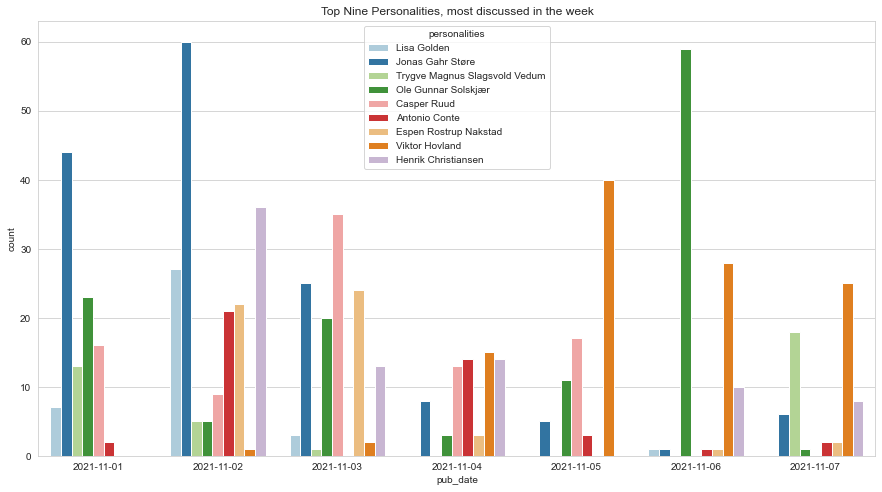

In [31]:
# visualizing top 10 personalities discussed in Norwegian articles
sns.set_style("whitegrid") 
plt.figure(figsize=(15,8))
palette = sns.color_palette("bright")
plt.title('Top Nine Personalities, most discussed in the week')
sns.countplot(x='pub_date', hue='personalities',data = top_10_persons, palette = sns.color_palette("Paired"))